In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt 

from glob import glob 
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator 
from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from keras.utils import to_categorical 
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping



Using TensorFlow backend.


In [2]:
paths = os.listdir(path = "../input")
print(paths)

['chest-xray-pneumonia']


In [3]:
train_path = "../input/chest-xray-pneumonia/chest_xray/train"
val_path = "../input/chest-xray-pneumonia/chest_xray/val"
test_path = "../input/chest-xray-pneumonia/chest_xray/test"

In [4]:
#Pneumonia:

img = glob(train_path+"/PNEUMONIA/*.jpeg")

In [5]:
img = np.asarray(plt.imread(img[0]))

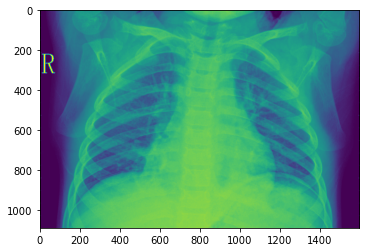

In [6]:
plt.imshow(img)

In [7]:
img.shape

(1088, 1600)

In [8]:
#Data Preprocessing 

classes = ["NORMAL", "PNEUMONIA"]

train_data = glob(train_path+"/NORMAL/*.jpeg")
train_data += glob(train_path+"/PNEUMONIA/*.jpeg")
data_gen = ImageDataGenerator()

In [9]:
train_batch = data_gen.flow_from_directory(train_path, target_size = (226, 226), classes = classes, class_mode = "categorical")
test_batch = data_gen.flow_from_directory(test_path, target_size = (226, 226), classes = classes, class_mode = "categorical" )
val_batch = data_gen.flow_from_directory(val_path, target_size = (226, 226), classes = classes, class_mode = "categorical")


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [10]:
train_batch.image_shape

(226, 226, 3)

**Convolutional Neural Network**

A Convolutional Neural Network, CNN for short, convolve images/arrays on the data that is being trained on. The input into a CNN is a tensor that is taken through a convolutional layer, allowing the image to become abstracted to a feature map and convolved. 

In [15]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=train_batch.image_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_14 (ZeroPaddi (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 226, 226, 64)      1792      
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 228, 228, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 226, 226, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 113, 113, 64)      0         
_________________________________________________________________
zero_padding2d_16 (ZeroPaddi (None, 115, 115, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 113, 113, 128)    

In [17]:
optimizer = Adam(lr = 0.0001)
early_stopping_monitor = EarlyStopping(patience = 3, monitor = "val_accuracy", mode = "max", verbose = 2)

model.compile(loss = "categorical_crossentropy", metrics = ['accuracy'], optimizer=optimizer)

history = model.fit_generator(epochs = 5, callbacks = [early_stopping_monitor], shuffle = True, validation_data = val_batch, generator = train_batch, steps_per_epoch = 500, validation_steps = 10,  verbose = 2)
prediction = model.predict_generator(generator = train_batch, verbose = 2, steps = 100)

Epoch 1/5
 - 424s - loss: 0.2052 - accuracy: 0.9143 - val_loss: 0.2649 - val_accuracy: 0.8750
Epoch 2/5
 - 421s - loss: 0.0601 - accuracy: 0.9783 - val_loss: 0.3035 - val_accuracy: 0.8750
Epoch 3/5
 - 419s - loss: 0.0307 - accuracy: 0.9884 - val_loss: 0.1551 - val_accuracy: 0.9375
Epoch 4/5
 - 422s - loss: 0.0238 - accuracy: 0.9911 - val_loss: 0.1206 - val_accuracy: 0.9375
Epoch 5/5
 - 422s - loss: 0.0257 - accuracy: 0.9909 - val_loss: 0.3263 - val_accuracy: 0.8750


KeyError: 'val_acc'

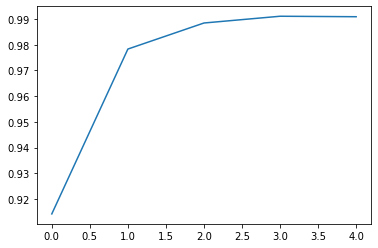

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()